# PYTHON PROGRAMMING FUNDAMENTALS 


# 목적 : 리뷰로부터 인사이트를 얻고, 감성분석을 해본다

# DATA OVERVIEW

- 데이터셋은 아마존의 알렉사(음성인식) 제품에 대한, 3000개의 리뷰로 되어있습니다.eco 제품
- 컬럼은 rating,	date,	variation(제품모델),	verified_reviews,	feedback
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews


![image.png](attachment:image.png)

# 실습 1. 패키지 설치

프로젝트를 위해, 아나콘다 프롬프트를 실행하고, 다음을 install 한다.

conda install -c conda-forge wordcloud

- 워드클라우드 글씨 시각화 하는 라이브러리
- 코랩엔 이미 설치돼있으로 설치x

## IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sb # Statistical data visualization
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 실습 2. pandas로 파일 읽기 - 탭으로 되어 있는 tsv 파일 읽기

In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/빅데이터 분석')

In [5]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t') # 이 파일은 구글 드라이브에 있는데 이를 코랩에서 열려면 둘을 마운트 해야 한다. os 경로세팅도 해야함

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# rating 과 varified_reviews 분석해보자. feedback 1은 긍정 0은 부정

# 실습 3. verified_reviews 컬럼의 내용 확인

In [ ]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [ ]:
len(df['verified_reviews'][2])

195

In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# 실습 4. 피드백은 0과 1로 되어있다.
## 1은 긍정, 0은 부정.
## 긍정 리뷰와 부정리뷰의 갯수를 그래프로 나타낸다.

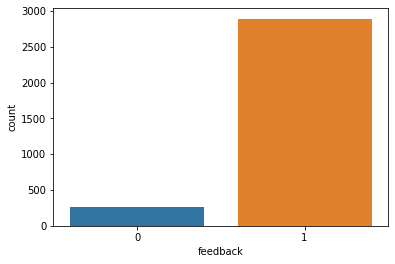

In [ ]:
sb.countplot(data =df, x = 'feedback')
plt.show()

In [ ]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

# 실습 5. rating 은 0 ~ 5로 되어있다.
## 유저의 별점(rationg) 별 리뷰갯수를 그래프로 나타낸다.

In [ ]:
index_order = df['rating'].value_counts().index

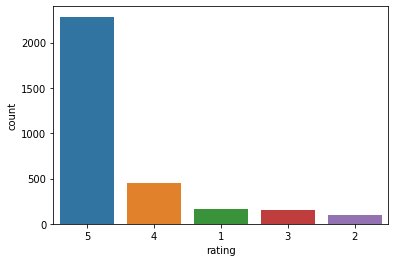

In [ ]:
sb.countplot(data =df, x = 'rating',order=index_order) # 정렬 후 차트

plt.show()

# WORD CLOUD 사용하여, 유저들이 어떤 단어를 많이 사용하였는지 시각화 한다.

# 먼저 WORD CLOUD 를 이용하기 위해서, verified_reviews 를 하나의 문자열로 만든다.

## 실습 1. verified_reviews 를 하나의 리스트로 만든다.

In [ ]:
review_list = df['verified_reviews'].tolist()  # 하나의 리스트로 만들고나면 리스트 조인이 가능. 거대한 문자열로 만들어서 워드클라우드 사용해야함

In [ ]:
print(review_list)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

## 실습 2. 위의 words 리스트를, " " (공백) 으로 합쳐서, 하나의 문자열로 만든다.

In [ ]:
review_as_one_string = " ".join(review_list)  # ' ' 공백으로 합치기

## 실습 3. WordCloud 를 이용하여, 화면에 많이 나온 단어들을 시각화 한다.

In [7]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color='orange', max_words=500) # 글자갯수 500개로 셑

In [ ]:
wc_gen = wc.generate(review_as_one_string)

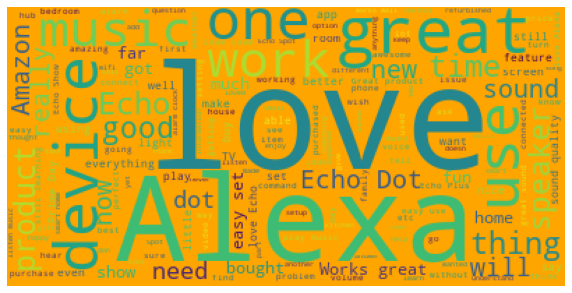

In [ ]:
plt.figure(figsize=(10,13))

plt.imshow(wc_gen)
plt.axis('off') # 좌표없애기

plt.show()

## 실습 4. Data Cleaning 과 Feature Engineering

- 분석을 위해 문자를 숫자로 바꾼다. 단어를 알파벳 순으로 세고 갯수 카운드, 자연어

In [8]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

In [11]:
vectorizer.fit_transform(df['verified_reviews'])
# fit 학습하라(단어 뽑아서 정렬해서 컬럼으로 만들어라)
# transform 학습하고 바궈서 간져와라 (숫자 집어넣어서 가져와라)

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [ ]:
# 3150 4044 리뷰갯수 3150개 컬럼수가 4044개 리뷰제거 후 단어갯수가 4044개

In [12]:
alexa_vc = vectorizer.fit_transform(df['verified_reviews'])

In [13]:
vectorizer.get_feature_names() # 백터라이져가 이 단어를 숫자로 바꿔준거다

['00',
 '000',
 '07',
 '10',
 '100',
 '100x',
 '11',
 '1100sf',
 '12',
 '129',
 '12am',
 '15',
 '150',
 '18',
 '19',
 '1964',
 '1990',
 '1gb',
 '1rst',
 '1st',
 '20',
 '200',
 '2000',
 '2017',
 '229',
 '23',
 '24',
 '25',
 '29',
 '2nd',
 '2package',
 '30',
 '300',
 '30pm',
 '34',
 '360',
 '39',
 '3rd',
 '3x',
 '3xs',
 '40',
 '45',
 '48',
 '4am',
 '4ghz',
 '4k',
 '4th',
 '50',
 '54',
 '5am',
 '5ghz',
 '5th',
 '600',
 '62',
 '672',
 '6th',
 '70',
 '75',
 '79',
 '80',
 '80s',
 '81',
 '83',
 '85',
 '88',
 '888',
 '8gb',
 '90',
 '91',
 '911',
 '99',
 '_specifically_',
 'a1',
 'a19',
 'abay',
 'abc',
 'abd',
 'abilities',
 'ability',
 'able',
 'abode',
 'about',
 'above',
 'absolutely',
 'absolutly',
 'ac',
 'accent',
 'acceptable',
 'accepting',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessories',
 'accesss',
 'accident',
 'accidentally',
 'accompanying',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accu

In [15]:
len(vectorizer.get_feature_names())

4044

In [16]:
alexa_vc.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
alexa_vc.shape

(3150, 4044)

In [19]:
df['verified_reviews'][0]

'Love my Echo!'

In [20]:
word_count_array = alexa_vc.toarray()

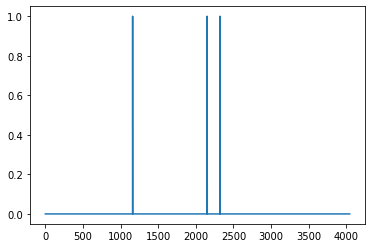

In [21]:
plt.plot(word_count_array[ 0, : ])  # numpy[행,렬] , 시각화
plt.show()

In [22]:
df['verified_reviews'][1]

'Loved it!'

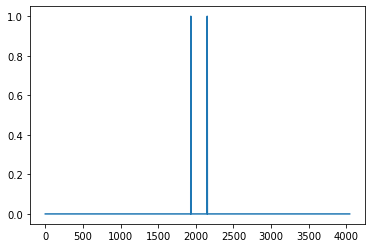

In [23]:
plt.plot(word_count_array[ 1, : ])  # numpy[행,렬] , 시각화
plt.show()

In [24]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

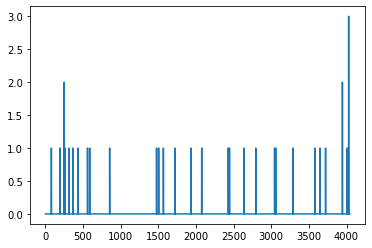

In [25]:
plt.plot(word_count_array[ 2, : ])  # numpy[행,렬] , 시각화
plt.show()

- 리뷰의 글자갯수와 별점은 관계가 있을까?
- 리뷰를 길게 쓰면 별점을 잘 줄까?
- 리뷰를 짧게 쓰면 별점을 잘 줄까?

In [33]:
count = []

for i in range(0, 3150):
  count.append(word_count_array[i, :].sum())

count

[3,
 2,
 35,
 30,
 1,
 29,
 70,
 37,
 2,
 17,
 14,
 31,
 58,
 3,
 3,
 5,
 12,
 41,
 15,
 80,
 45,
 69,
 41,
 10,
 28,
 2,
 27,
 4,
 25,
 5,
 12,
 2,
 30,
 51,
 4,
 53,
 26,
 7,
 17,
 92,
 18,
 30,
 4,
 15,
 1,
 26,
 29,
 14,
 4,
 36,
 9,
 22,
 19,
 20,
 3,
 19,
 13,
 7,
 6,
 36,
 0,
 14,
 18,
 9,
 34,
 7,
 28,
 7,
 6,
 29,
 14,
 4,
 10,
 2,
 4,
 2,
 116,
 8,
 3,
 5,
 43,
 9,
 17,
 33,
 2,
 0,
 2,
 6,
 15,
 21,
 31,
 5,
 4,
 15,
 106,
 13,
 12,
 47,
 2,
 12,
 38,
 2,
 4,
 17,
 48,
 10,
 10,
 26,
 56,
 11,
 5,
 10,
 46,
 27,
 30,
 55,
 13,
 7,
 9,
 8,
 44,
 22,
 5,
 13,
 12,
 11,
 33,
 12,
 22,
 63,
 3,
 31,
 69,
 4,
 4,
 56,
 3,
 2,
 12,
 30,
 102,
 3,
 13,
 1,
 16,
 42,
 34,
 27,
 19,
 16,
 46,
 2,
 4,
 36,
 14,
 45,
 97,
 16,
 163,
 3,
 10,
 19,
 13,
 16,
 68,
 4,
 13,
 11,
 10,
 34,
 2,
 10,
 10,
 24,
 16,
 2,
 3,
 1,
 3,
 15,
 16,
 2,
 45,
 0,
 92,
 4,
 6,
 56,
 105,
 1,
 22,
 14,
 34,
 6,
 24,
 3,
 2,
 118,
 11,
 13,
 2,
 58,
 10,
 10,
 12,
 23,
 10,
 2,
 41,
 3,
 2,
 21,
 76,
 2,


In [30]:
word_count_array.shape

(3150, 4044)

In [34]:
df['count'] = count

df.head()

,rating,date,variation,verified_reviews,feedback,count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,35
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,30
4,5,31-Jul-18,Charcoal Fabric,Music,1,1


- 관계없다.

In [35]:
df[ ['rating', 'count']].corr() # 관계없다

,rating,count
rating,1.000000,-0.187013
count,-0.187013,1.000000


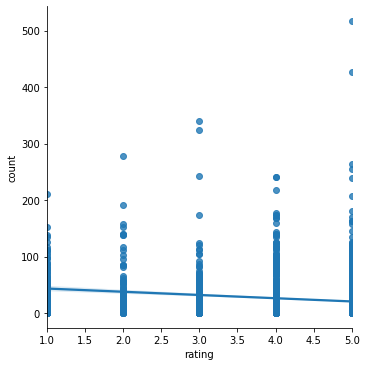

In [36]:
sb.lmplot(x="rating", y="count", data=df)
plt.show()

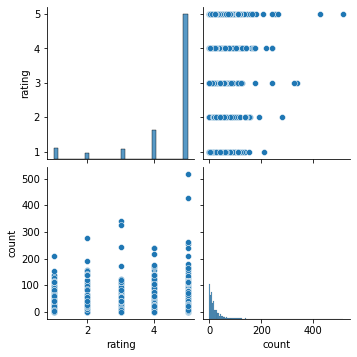

In [37]:
sb.pairplot(data = df, vars=['rating', 'count'])
plt.show()

In [50]:
df['review len'] = df['verified_reviews'].apply(len)

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: verified_reviews, Length: 3150, dtype: int64

In [49]:
df['verified_reviews'].sum()

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

- 두 컬럼간의 관계를 시각화 할 때는 스케터 
- scatter pairplot regplot 사용하자

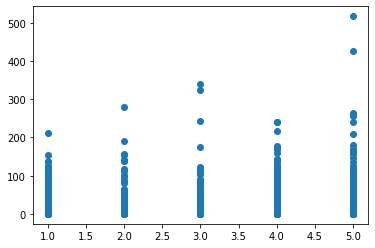

In [38]:
plt.scatter(data = df, x='rating', y= 'count')
plt.show()

- 너무 밀접해있어 알아볼수가없으니까 히트맵 써야 함

In [1]:
'''
plt.hist2d(data = df, x = 'count', y= 'rating', cmin = 0.5, cme = 'viridis_r', bins = 20)
plt.colorbar()
plt.show()
'''

"\nplt.hist2d(data = df, x = 'count', y= 'rating', cmin = 0.5, cme = 'viridis_r', bins = 20)\nplt.colorbar()\nplt.show()\n"

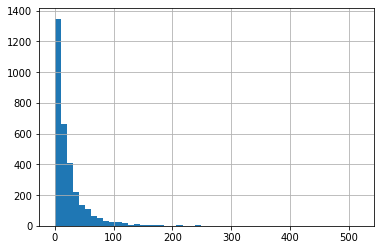

In [46]:
df['count'].hist( bins = 50)  # pandas 의 plot, mins 50개 구간으로 나눠봐라
plt.show()

In [47]:
df.describe()

,rating,feedback,count
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,23.852698
std,1.068506,0.273778,32.621630
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,5.000000
50%,5.000000,1.000000,13.000000
75%,5.000000,1.000000,30.000000
max,5.000000,1.000000,517.000000


In [ ]:
df['verified_reviews'] == df['verified_reviews'].min()

In [48]:
df.loc[ df['verified_reviews'] == df['verified_reviews'].min() ,  ]

,rating,date,variation,verified_reviews,feedback,count
85,5,30-Jul-18,Heather Gray Fabric,,1,0
183,3,29-Jul-18,Heather Gray Fabric,,1,0
219,5,29-Jul-18,Sandstone Fabric,,1,0
374,1,26-Jul-18,Black,,0,0
406,1,16-Jul-18,White,,0,0
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,0
3120,5,30-Jul-18,Black Dot,,1,0
3123,4,30-Jul-18,Black Dot,,1,0
3126,5,30-Jul-18,Black Dot,,1,0
